## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.324521 -1.276003  0.340776  0.233806  0.009533 -1.101790
1 -1.314751  0.312266  1.249869  0.660834 -0.589477 -0.321375
2 -0.661209 -0.071754 -0.938055 -0.886680 -0.372196 -0.779001
3  1.034969  0.370749  0.619416 -0.593632  0.567262  0.588198
4 -1.451662 -0.868609  0.911284  0.696214 -0.606780 -0.797282


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0121316	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0027599	total: 70.1ms	remaining: 35s
2:	learn: 0.9926452	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9815526	total: 71.3ms	remaining: 17.8s
4:	learn: 0.9729710	total: 71.8ms	remaining: 14.3s
5:	learn: 0.9635747	total: 72.2ms	remaining: 12s
6:	learn: 0.9536252	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9439214	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9353533	total: 73.9ms	remaining: 8.13s
9:	learn: 0.9264682	total: 74.5ms	remaining: 7.38s
10:	learn: 0.9173584	total: 75.1ms	remaining: 6.75s
11:	learn: 0.9071106	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8979122	total: 76.1ms	remaining: 5.78s
13:	learn: 0.8891352	total: 76.6ms	remaining: 5.39s
14:	learn: 0.8822901	total: 77.2ms	remaining: 5.07s
15:	learn: 0.8738302	total: 77.7ms	remaining: 4.78s
16:	learn: 0.8660427	total: 78.3ms	remaining: 4.53s
17:	learn: 0.8584176	total: 78.8ms	remaining: 4.3s
18:	learn: 0.8523928	total: 79.4ms	remaining: 4.1

84:	learn: 0.4800245	total: 109ms	remaining: 1.17s
85:	learn: 0.4756179	total: 109ms	remaining: 1.16s
86:	learn: 0.4716738	total: 110ms	remaining: 1.16s
87:	learn: 0.4675132	total: 111ms	remaining: 1.15s
88:	learn: 0.4636640	total: 111ms	remaining: 1.14s
89:	learn: 0.4608203	total: 112ms	remaining: 1.13s
90:	learn: 0.4566246	total: 112ms	remaining: 1.12s
91:	learn: 0.4528758	total: 113ms	remaining: 1.11s
92:	learn: 0.4494973	total: 113ms	remaining: 1.1s
93:	learn: 0.4458542	total: 113ms	remaining: 1.09s
94:	learn: 0.4421795	total: 114ms	remaining: 1.08s
95:	learn: 0.4391855	total: 114ms	remaining: 1.07s
96:	learn: 0.4359406	total: 115ms	remaining: 1.07s
97:	learn: 0.4325691	total: 115ms	remaining: 1.06s
98:	learn: 0.4289662	total: 115ms	remaining: 1.05s
99:	learn: 0.4252277	total: 116ms	remaining: 1.04s
100:	learn: 0.4218035	total: 116ms	remaining: 1.03s
101:	learn: 0.4186175	total: 117ms	remaining: 1.03s
102:	learn: 0.4155699	total: 117ms	remaining: 1.02s
103:	learn: 0.4123873	total: 

249:	learn: 0.1485328	total: 188ms	remaining: 563ms
250:	learn: 0.1474599	total: 188ms	remaining: 561ms
251:	learn: 0.1464432	total: 188ms	remaining: 559ms
252:	learn: 0.1455869	total: 189ms	remaining: 557ms
253:	learn: 0.1445750	total: 189ms	remaining: 556ms
254:	learn: 0.1435429	total: 190ms	remaining: 554ms
255:	learn: 0.1425959	total: 190ms	remaining: 553ms
256:	learn: 0.1416610	total: 191ms	remaining: 551ms
257:	learn: 0.1407494	total: 191ms	remaining: 550ms
258:	learn: 0.1398136	total: 192ms	remaining: 548ms
259:	learn: 0.1388779	total: 192ms	remaining: 547ms
260:	learn: 0.1380969	total: 193ms	remaining: 545ms
261:	learn: 0.1371970	total: 193ms	remaining: 544ms
262:	learn: 0.1363752	total: 194ms	remaining: 542ms
263:	learn: 0.1356758	total: 194ms	remaining: 541ms
264:	learn: 0.1349236	total: 194ms	remaining: 539ms
265:	learn: 0.1341094	total: 195ms	remaining: 538ms
266:	learn: 0.1334335	total: 195ms	remaining: 536ms
267:	learn: 0.1325645	total: 196ms	remaining: 535ms
268:	learn: 

470:	learn: 0.0396109	total: 292ms	remaining: 328ms
471:	learn: 0.0394289	total: 293ms	remaining: 327ms
472:	learn: 0.0392509	total: 293ms	remaining: 327ms
473:	learn: 0.0390424	total: 293ms	remaining: 326ms
474:	learn: 0.0388696	total: 294ms	remaining: 325ms
475:	learn: 0.0386682	total: 294ms	remaining: 324ms
476:	learn: 0.0384781	total: 295ms	remaining: 323ms
477:	learn: 0.0382758	total: 295ms	remaining: 323ms
478:	learn: 0.0381589	total: 296ms	remaining: 322ms
479:	learn: 0.0380135	total: 296ms	remaining: 321ms
480:	learn: 0.0378447	total: 297ms	remaining: 320ms
481:	learn: 0.0376616	total: 297ms	remaining: 319ms
482:	learn: 0.0375300	total: 297ms	remaining: 318ms
483:	learn: 0.0373400	total: 298ms	remaining: 317ms
484:	learn: 0.0372295	total: 298ms	remaining: 317ms
485:	learn: 0.0369928	total: 299ms	remaining: 316ms
486:	learn: 0.0368847	total: 299ms	remaining: 315ms
487:	learn: 0.0367288	total: 299ms	remaining: 314ms
488:	learn: 0.0365539	total: 300ms	remaining: 313ms
489:	learn: 

638:	learn: 0.0197133	total: 372ms	remaining: 210ms
639:	learn: 0.0196191	total: 372ms	remaining: 209ms
640:	learn: 0.0195002	total: 373ms	remaining: 209ms
641:	learn: 0.0194062	total: 373ms	remaining: 208ms
642:	learn: 0.0193146	total: 374ms	remaining: 208ms
643:	learn: 0.0192006	total: 374ms	remaining: 207ms
644:	learn: 0.0191122	total: 375ms	remaining: 206ms
645:	learn: 0.0190134	total: 375ms	remaining: 205ms
646:	learn: 0.0189277	total: 375ms	remaining: 205ms
647:	learn: 0.0188443	total: 376ms	remaining: 204ms
648:	learn: 0.0187359	total: 376ms	remaining: 203ms
649:	learn: 0.0186664	total: 377ms	remaining: 203ms
650:	learn: 0.0185919	total: 377ms	remaining: 202ms
651:	learn: 0.0185192	total: 378ms	remaining: 202ms
652:	learn: 0.0184516	total: 378ms	remaining: 201ms
653:	learn: 0.0183777	total: 379ms	remaining: 200ms
654:	learn: 0.0182838	total: 379ms	remaining: 200ms
655:	learn: 0.0182183	total: 380ms	remaining: 199ms
656:	learn: 0.0181544	total: 380ms	remaining: 199ms
657:	learn: 

855:	learn: 0.0099158	total: 476ms	remaining: 80.1ms
856:	learn: 0.0098704	total: 476ms	remaining: 79.5ms
857:	learn: 0.0098361	total: 477ms	remaining: 78.9ms
858:	learn: 0.0097917	total: 477ms	remaining: 78.3ms
859:	learn: 0.0097494	total: 478ms	remaining: 77.8ms
860:	learn: 0.0097079	total: 479ms	remaining: 77.3ms
861:	learn: 0.0096744	total: 480ms	remaining: 76.8ms
862:	learn: 0.0096325	total: 480ms	remaining: 76.2ms
863:	learn: 0.0095926	total: 481ms	remaining: 75.6ms
864:	learn: 0.0095597	total: 481ms	remaining: 75ms
865:	learn: 0.0095195	total: 481ms	remaining: 74.5ms
866:	learn: 0.0094812	total: 482ms	remaining: 73.9ms
867:	learn: 0.0094437	total: 482ms	remaining: 73.4ms
868:	learn: 0.0094122	total: 483ms	remaining: 72.8ms
869:	learn: 0.0093739	total: 483ms	remaining: 72.2ms
870:	learn: 0.0093390	total: 484ms	remaining: 71.7ms
871:	learn: 0.0093069	total: 484ms	remaining: 71.1ms
872:	learn: 0.0092752	total: 485ms	remaining: 70.5ms
873:	learn: 0.0092442	total: 485ms	remaining: 70

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

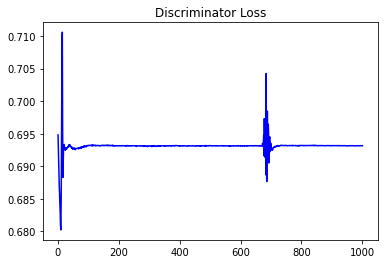

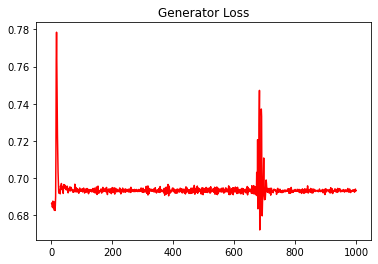

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16144795239070595


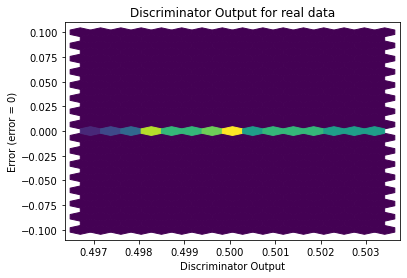

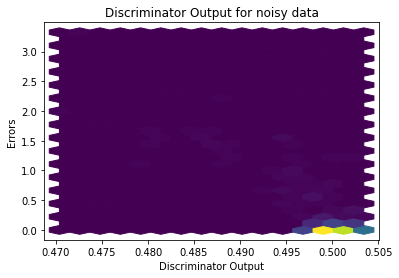

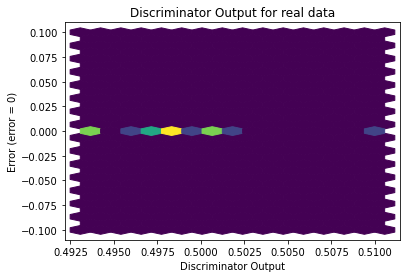

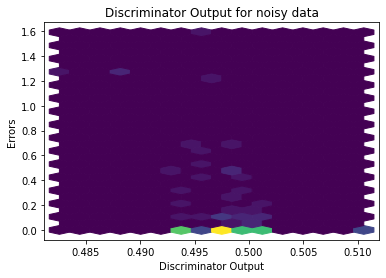

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


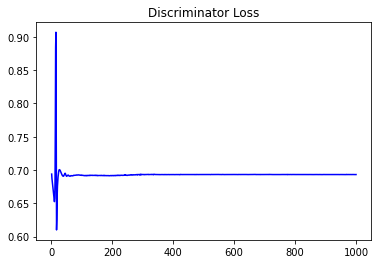

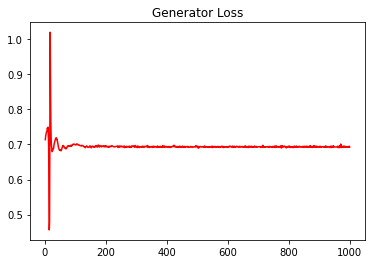

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18161960815306244


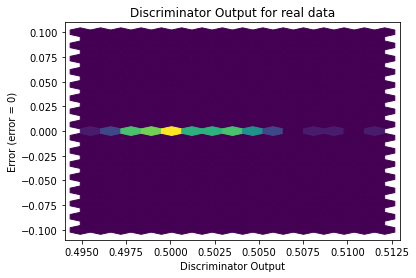

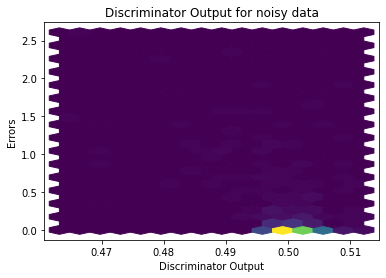

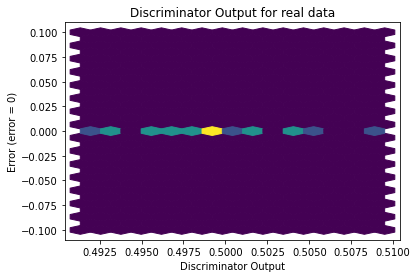

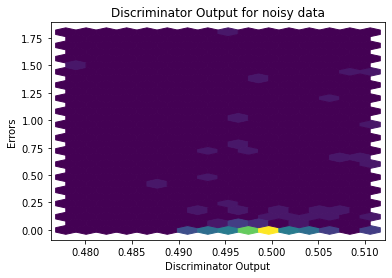

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0641]], requires_grad=True)
